## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data["Mouse ID"].value_counts()

g989    13
j119    10
p438    10
j296    10
a685    10
        ..
h428     1
t573     1
x336     1
l872     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_ID = combined_data.set_index("Mouse ID")

# double = combined_data.loc[combined_data["Mouse ID"] == "g989"]
# double

dupe = combined_ID.loc["g989", :]
dupe

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_ID.drop(["g989"])

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [8]:
clean_index = clean_data.reset_index()
clean_index

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = clean_index[["Drug Regimen", "Tumor Volume (mm3)"]]

drug_group = tumor_vol.groupby("Drug Regimen")

drug_group_mean = drug_group.mean()
drug_group_median = drug_group.median()
drug_group_var = drug_group.var()
drug_group_std = drug_group.std()
drug_group_sem = drug_group.sem()

# drug_group_std
# # This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_m = pd.merge(drug_group_mean, drug_group_median, on="Drug Regimen", how="outer")
tumor_vol_m.columns = ["Tumor Volume Mean", "Tumor Volume Median"]

tumor_vol_mv = pd.merge(tumor_vol_m, drug_group_var, on="Drug Regimen", how="outer")
tumor_vol_mvs = pd.merge(tumor_vol_mv, drug_group_std, on="Drug Regimen", how="outer")
tumor_vol_summary = pd.merge(tumor_vol_mvs, drug_group_sem, on="Drug Regimen", how="outer")
tumor_vol_summary.columns = ["Tumor Volume Mean", "Tumor Volume Median", "Tumor Volume Variance", "Tumor Volume Standard Deviation", "Tumor Volume SEM"]

tumor_vol_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# drug_group.describe()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

In [127]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_total = clean_index[["Drug Regimen", "Mouse ID"]]
drug_list = clean_index["Drug Regimen"].unique()

mice_drugs = mouse_total.groupby("Drug Regimen")
total_mice = mice_drugs["Mouse ID"].unique()
# total_mice

mouse_count = [len(total_mice[0]), len(total_mice[1]), len(total_mice[2]), len(total_mice[3]), len(total_mice[4]), len(total_mice[5]), len(total_mice[6]), len(total_mice[7]), len(total_mice[8]), len(total_mice[9])]

mouse_count_total = list(zip(drug_list, mouse_count))
m_count_tot = pd.DataFrame(mouse_count_total)
m_count_tot.columns = ["Drug Regimen", "Total Mice"]
m_count_final = m_count_tot.set_index("Drug Regimen")


Text(0, 0.5, 'Total Mice')

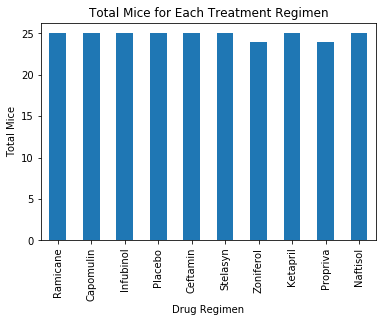

In [130]:
pandas_plot = m_count_final.plot(kind="bar", title="Total Mice for Each Treatment Regimen", legend=False)
pandas_plot.set_ylabel("Total Mice")

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
